# EDA of NFL Big Data Bowl 2021

This is my warm-up data wrangling for the competition.

I greatly appreciate for your advice because this is my first scripting in Python.

## Eplore data files

In [13]:
import os
datdir = '../input/nfl-big-data-bowl-2021/'
os.listdir(datdir)

['week1.csv',
 'week2.csv',
 'week3.csv',
 'plays.csv',
 'week7.csv',
 'week6.csv',
 'week4.csv',
 'week5.csv',
 'week12.csv',
 'week13.csv',
 'week11.csv',
 'week10.csv',
 'week14.csv',
 'week15.csv',
 'week17.csv',
 'week16.csv',
 'players.csv',
 'games.csv',
 'week8.csv',
 'week9.csv']

This dataset is composed of four types of files:

`plays.csv`, `players.csv`, `games.csv`, and many `week1?[0-9].csv` files.


### Look into  'plays' data'

In [41]:
import pandas as pd
plays = pd.read_csv(datdir + 'plays.csv')

In [42]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [43]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [50]:
plays.groupby('gameId').count()

,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
gameId,,,,,,,,,,,,,,,,,,,,,
2018090600,89,89,89,89,89,89,89,88,89,88,...,84,84,84,8,8,89,89,89,89,89
2018090900,79,79,79,79,79,79,79,79,79,79,...,76,76,76,5,5,79,79,79,79,79
2018090901,94,94,94,94,94,94,94,92,94,93,...,91,91,91,10,10,94,94,94,94,94
2018090902,89,89,89,89,89,89,89,89,89,89,...,85,85,85,7,7,89,89,89,89,89
2018090903,68,68,68,68,68,68,68,65,68,67,...,67,67,67,3,3,68,68,68,68,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018123011,64,64,64,64,64,64,64,64,64,64,...,63,63,63,4,4,64,64,64,64,64
2018123012,69,69,69,69,69,69,69,68,69,68,...,69,69,69,1,1,69,69,69,69,69
2018123013,73,73,73,73,73,73,73,72,73,73,...,71,71,71,5,5,73,73,73,73,73


This file is composed of 25 types of play information, recorded by each `gameId`.

The breakdown of the 25 columns are as follows:

|columnName| Type | Description
| :--: | :--: | :-- |
| `playId` | integer|external keys for each `play`
| `playDescription`         | string | description of each `play`
| `quarter`                 | integer | either from the 1st to the 4th, and the 5th!
| `down`                    | integer | either from the 1st to the 4th
| `yardsToGo`               | integer | distance in yards that offense earned
| `possessionTeam`          | string| external keys for team names
| `playType`                | string| either pass, sack or unknown
| `yardlineSide`            | string| external keys for team names
| `yardlineNumber`          | integer | eiter from one to 50
| `offenseFormation`        | string| any of the following: `I_FORM`, `SINGLEBACK`, `SHOTGUN`, `EMPTY`, `PISTOL`, `WILDCAT`, `JUMBO`, or `nan`
| `personnelO`              | string| number of offense players concerned the play
| `defendersInTheBox`       | float| number of defenders (1--11) in the area located 5--10 yards forward of the offensive line
| `numberOfPassRushers`     | float| number of defences that put pressure to the player trying to pass
| `personnelD`              | string|number of defense players concerned the play
| `typeDropback`            | string| number type of backstep before pass mortion, one of: `TRADITIONAL`, `SCRAMBLE_ROLLOUT_LEFT`, `DESIGNED_ROLLOUT_LEFT`, `SCRAMBLE_ROLLOUT_RIGHT`, `DESIGNED_ROLLOUT_RIGHT`, `SCRAMBLE`, `UNKNOWN`, or `nan`
| `preSnapVisitorScore`     | float|score of the visitor team just before the snap
| `preSnapHomeScore`        | float|score of the home team just before the snap
| `gameClock`               | string| time in `hh:mm:ss`
| `absoluteYardlineNumber`  | float| either value from 11 to 109, or `nan`
| `penaltyCodes`            | string| type of fouls in [code](https://www.fwfo.org/Forms/Upload/137.pdf)
| `penaltyJerseyNumbers`    | string| Abbreviation and jersy number who received the penalty
| `passResult`              | string| Result of pass play---C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass
| `offensePlayResult`       | integer | yards offense gained by the play
| `playResult`              | integer | Net yards offense gained including penalty yardage
| `epa`                     | float| sum of the expected points
| `isDefensivePI`           | boolean |whether the play was judged as a defensive pass interference or not

When creating this table, I referenced these information.

- https://www.kaggle.com/docxian/nfl-bd-bowl-2021-players-and-play-evaluation
- https://www.advancedfootballanalytics.com/index.php/home/stats/stats-explained/glossary


<AxesSubplot:>

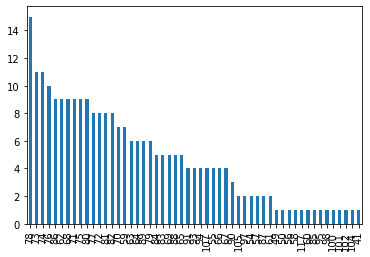

In [62]:
grouped = plays.groupby('gameId').count()
grouped['playId'].value_counts().plot(kind='bar')

description
contains time and description
sometimes formation


In [ ]:
formations
there are 14 formations

# References
I referenced informations below
- https://www.kaggle.com/docxian/nfl-bd-bowl-2021-players-and-play-evaluation